## Question 1

The standard Cauchy distribution can be defined as : $\\$ 
     $\hspace{5cm}$           $\pi(Z_t)$ = $\frac{1}{\pi(1 + x^2)}\\$
then normal proposal distribution can be defined as : $\\$
     $\hspace{5cm}$           $\mathbb{g}(Z_t) = \frac{1}{\sigma\sqrt{2\pi}}exp\left(\frac{(x-\mu)^2}{2\sigma^2}\right)$ $\\$

Using this estimator for importance sampling we can verify whether the variance is finite or not if : $\\$
     $\hspace{5cm}$    $\sup_{z \in X}\frac{\pi(z)}{g(z)}\leq M < \infty$   $\\$

Now we have : $\hspace{3cm}$  $\frac{\pi(z)}{g(z)} = \frac{\sigma\sqrt{2}\hspace{0.1cm}\mathbb{exp}\left(\frac{(x-\mu)^2}{2\sigma^2}\right)}{\sqrt{\pi}(1 + x^2)}$
$\\$

Here we can easily see that the maximum of this expression can be very well infinity and hence the variance of this estimator is not finite

## Question 2

### a)

The weighted importance estimator will also have a finite variance as :$\\$ 
$\hspace{5cm}   Variance(weighted) = \sigma_{g}^2\left(1 + \frac{\mathbb{Var_g}(w(Z))}{[E_g(w(Z))]^2}\right) \\$

Here we can define w(Z) as : $\\$

$\hspace{5cm}  \mathbb{w(Z)} = \frac{b\pi(Z)}{ag(Z)} \\$

Given that  :  $\hspace{3cm} \sup_{x}\frac{\pi(Z)}{g(Z)}  <  \infty$

$\\ \hspace{4cm} \Rightarrow Var_g(w(Z)) < \infty  \hspace{0.1cm}and \hspace{0.1cm} E_g(w(Z)) < \infty \\$ 

Since $\sigma_g$ is less than ininity we can conclude that variance of weighted estimator is also less than infinity.

### b)

Yes its benficial to use importance sampling over accept-reject sampling as we would be able to get zero variance original sample that would be unbiased i we choose the perfect proposal which is not possible in accept-reject.


## Question 3

In [1]:
using Distributions
using Plots
using Random
Random.seed!(1)
using Statistics


In [4]:
function q3(n,v)
    y = TDist(v)
    Y = rand(y,n)
    tot = 10000
    values = []
    values_den = []
    for i in 1:tot
        prod=1
        x = rand()
        for j in 1:n
            prod = prod*(1 + ((Y[j]-x)^2)/v)^(-1*(v+1)/2)
        end
        push!(values,x*prod)
        push!(values_den,prod)
    end
   
    return mean(values)/mean(values_den)

end

q3 (generic function with 1 method)

Mean : 0.14754048765467898
Variance : 0.005066811508151973

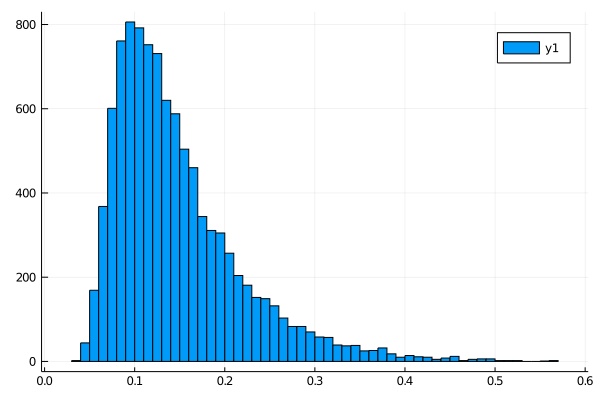

In [5]:
distribution = []
tot = 10000
n = 50
v = 5
for i in 1:tot
  val = q3(n,v)
  push!(distribution,val) 
 end
##variance = var/tot - (sum/tot)^2
print("Mean : ",mean(distribution))
print("\nVariance : ",var(distribution))
plot(distribution,seriestype=:histogram)


### We can clearly see here that the variance of this weighted importance sampler is finite as $\sigma_g$ is finite

## if we change the value of v to 1

Mean : 0.18268540700348973
 Variance : 0.007988153953256931

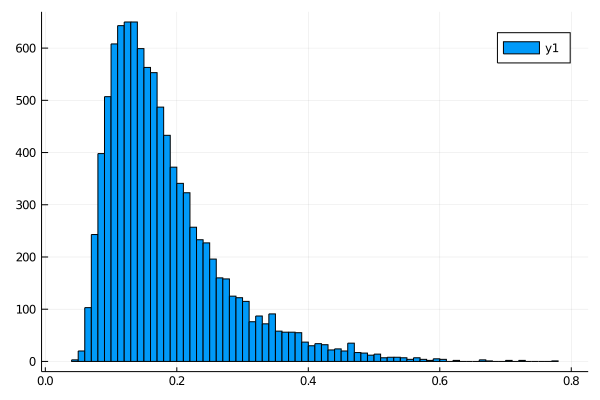

In [6]:
distribution = []
tot = 10000
n = 50
v = 1
for i in 1:tot
  val = q3(n,v)
  push!(distribution,val) 
 end
##variance = var/tot - (sum/tot)^2
print("Mean : ",mean(distribution))
print("\n Variance : ",var(distribution))
plot(distribution,seriestype=:histogram)


## if we change the value of v to 2

0.16688335388971262
0.006311872091081214

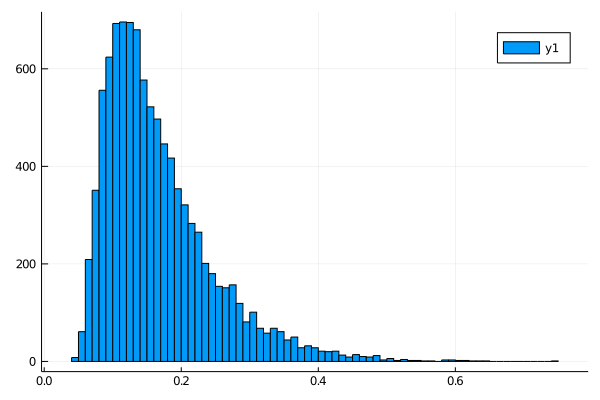

In [ ]:
distribution = []
tot = 10000
n = 50
v = 2
for i in 1:tot
  val = q3(n,v)
  push!(distribution,val) 
 end
##variance = var/tot - (sum/tot)^2
print("Mean : ",mean(distribution))
print("\n Variance : ",var(distribution))
plot(distribution,seriestype=:histogram)


## On changing the value of v to 2 and then 1 we see that the variance is increasing
 

## Question 4

The prior distribution is defined as : $\\$

$\hspace{5cm}$  $\mathbb{\pi(\lambda)} = Gamma(\alpha,\beta) = \frac{\lambda^{\alpha-1}\beta^{\alpha}e^{-\lambda\beta}}{\Gamma(\alpha)}$  $\\$

The base distribution on which i.i.d draws are taken is defined as : $\\$

$\hspace{5cm}  \mathbb(f)(Y_1,Y_2....,Y_n/\lambda) = Poisson(\lambda) = \prod_{i=1}^{n} \frac{e^{-\lambda}\lambda^{y_i}}{y_i!}\\$

Now the posterior distribution is defined as :$\\$

$ \mathbb{\pi(\lambda/Y_1,Y_2,...,Y_n)} \propto 
\mathbb{f(Y_1,Y_2....,Y_n/\lambda)} \mathbb{\pi(\lambda)} $
$\\ \hspace{10cm} \Rightarrow  \mathbb{\pi(\lambda/Y_1,Y_2,...,Y_n)} \propto \frac{\lambda^{\alpha-1}\beta^{\alpha}e^{-\lambda\beta}e^{-n\lambda}\lambda^{\sum_{i=1}^{n}y_i}}{\Gamma(\alpha)\prod_{i=1}^{n}y_i!}\\$
$\\ \hspace{10cm}\Rightarrow \mathbb{\pi(\lambda/Y_1,Y_2,...,Y_n)} \propto \lambda^{\alpha + \sum_{i=1}^{n}y_i - 1}\mathbb{e}^{-\lambda(n + \beta)}\\$

And hence we can see that the posterior distribution can be defined on the family of Gamma distributions as :

$\\ \hspace{5cm} \mathbb{\pi(\lambda/Y_1,Y_2,...,Y_n)}  \sim \mathbb{Gamma(\alpha + \sum_{i=1}^{n}y_i , n + \beta)}$